# Capítulo 5. Redes neuronales.
> Autor: Natalia Cely Callejas, Ronald Arturo Chavez.\
> Universidad Nacional de Colombia  
> Julio 3, 2025

## Introducción
Las redes neuronales son sistemas bioinspirados en el funcionamiento del cerebro humano, compuesto por neuronas artificiales distribuidas en tres capas principales: *Input*, *Hidden* y *Output*. Estos sistemas se entrenan basados en diferentes variables cuya influencia en el resultado se determina con pesos y sesgos, esto modifica los resultados entregados en función de su validación con los valores correctos y por medio de refuerzos/penalización a través de una base de datos extensa y representativa. Generalmente, son utilizadas con fines de clasificación, predicción, reconocimiento de voz y procesamiento de lenguaje.

## Ejemplo MEPX con Redes Neuronales
aaaaa

## Clasificación de prendas de vestir por redes neuronales
Haciendo uso del data set Fashion del MNIST

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7785 - loss: 0.6334
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8630 - loss: 0.3804
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8784 - loss: 0.3333
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8867 - loss: 0.3053
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8915 - loss: 0.2912
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8982 - loss: 0.2759
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9010 - loss: 0.2674
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9060 - loss: 0.2522
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9104 - loss: 0.2393
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9106 - loss: 0.2359
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8797 - loss: 0.3465

Precisión en test: 88.07%
313/313 ━━━

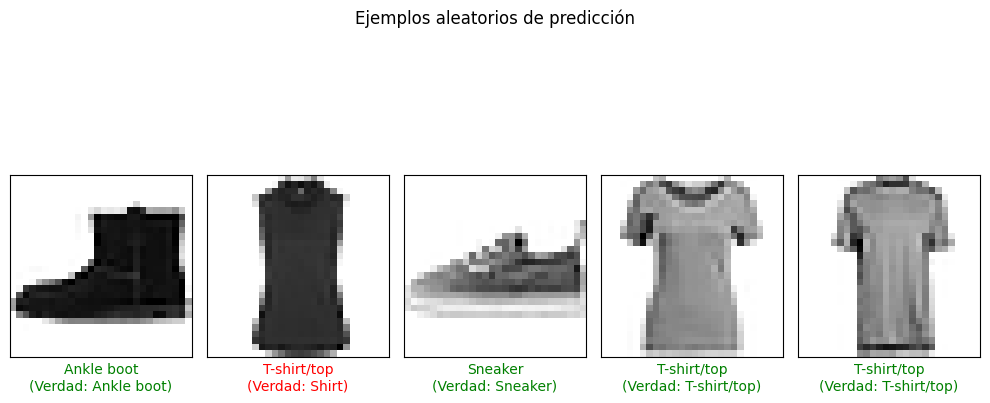

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

#----------
# Cargar el dataset Fashion MNIST y dividirlo para su entrenamiento y validación
#----------

fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

#-------------
# Nombres de las clases/labels 0-9 según repositorio
#--------------

nombres_clases = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                  'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#-----------
# Normalizar los datos (0-1)
#-----------

x_train = x_train / 255.0
x_test = x_test / 255.0

#-----------
# Definir el modelo secuencial
#-----------

modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),         # Capa de entrada
    tf.keras.layers.Dense(128, activation='relu'),         # Capa oculta
    tf.keras.layers.Dense(10, activation='softmax')        # Capa de salida (10 clases)
])

#-----------
# Compilación del modelo
#-----------

modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

#-----------
# Entrenar el modelo
#-----------

modelo.fit(x_train, y_train, epochs=10)

#-----------
# Evaluar en test
#-----------

test_loss, test_acc = modelo.evaluate(x_test, y_test)
print(f"\nPrecisión en test: {test_acc:.2%}")

#----------
# Predecir
#----------

predicciones = modelo.predict(x_test)

#----------
# Visualizar 5 predicciones de elementos aleatorios
#----------
indices = np.random.choice(len(x_test), size=5, replace=False)

plt.figure(figsize=(10,5))
for i, idx in enumerate(indices):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[idx], cmap=plt.cm.binary)
    pred = np.argmax(predicciones[idx])
    color = "green" if pred == y_test[idx] else "red"
    plt.xlabel(f"{nombres_clases[pred]}\n(Verdad: {nombres_clases[y_test[idx]]})", color=color)
plt.suptitle("Ejemplos aleatorios de predicción")
plt.tight_layout()
plt.show()


Data set Red neuronal Iris

In [2]:

import numpy as np
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

iris = load_iris()
X = iris.data
y = iris.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = Sequential([
    Dense(10, activation='relu', input_shape=(4,)),  # Capa oculta
    Dense(3, activation='softmax')  # Capa de salida
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, verbose=0)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"\nPrecisión del modelo en datos de prueba: {accuracy:.2f}")

weights_layer1, biases_layer1 = model.layers[0].get_weights()
weights_layer2, biases_layer2 = model.layers[1].get_weights()

# Usar un ejemplo con los pesos aprendidos
x_input = X_test[0]
print("\nEjemplo de entrada escalado:", x_input)

z1 = np.dot(x_input, weights_layer1) + biases_layer1
a1 = np.maximum(0, z1)  # ReLU
print("\nActivaciones capa 1 (ReLU):", a1)

z2 = np.dot(a1, weights_layer2) + biases_layer2

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

output_probs = softmax(z2)
predicted_class = np.argmax(output_probs)

print("\nProbabilidades (Softmax):", output_probs)
print("Clase predicha:", predicted_class)
print("Clase real:", y_test[0])

C:\Users\USUARIO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.8667 - loss: 0.5095

Precisión del modelo en datos de prueba: 0.87

Ejemplo de entrada escalado: [ 0.31099753 -0.59237301  0.53540856  0.00087755]

Activaciones capa 1 (ReLU): [0.         0.6884743  0.50125635 0.         0.57482839 0.54074957
 0.04678785 0.         0.39399499 0.35141836]

Probabilidades (Softmax): [0.13056058 0.47770007 0.39173935]
Clase predicha: 1
Clase real: 1


## Aporte de LLMs.

 En la red neuronal Iris recurrí al apoyo de una herramienta de lenguaje grande (LLM), ChatGPT, para resolver obstáculos técnicos específicos y agilizar el aprendizaje. También actuó como un asistente técnico complementario, facilitando el avance continuo del trabajo y promoviendo una comprensión más profunda del funcionamiento de las redes neuronales artificiales.

## Conclusiones. 
El desarrollo de una red neuronal artificial para la clasificación del conjunto de datos Iris permitió comprender de manera integral tanto los fundamentos teóricos como la aplicación práctica del aprendizaje automático supervisado. A través del diseño del modelo, la selección de funciones de activación adecuadas, el entrenamiento con datos normalizados y la evaluación de su desempeño, fue posible evidenciar cómo una red neuronal transforma los datos de entrada en decisiones predictivas mediante el ajuste de pesos internos.